# Predicting Loan approval

## Importing all the necessary libraries

In [1]:
import sys
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

from sklearn import preprocessing
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.neighbors import KNeighborsClassifier


## Load the dataset

In [3]:
df = pd.read_csv('Dataset/Loan_Default.csv')

## Dataset Info

In [4]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

## Missing/Duplicate/Null Values

In [6]:
df.isna().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [7]:
df.duplicated().sum()

0

In [8]:
for column in df.columns:
  if(df[column].dtype!='object'):
    if(df[column].isna().sum()>0):
      df[column]=df[column].fillna(df[column].mean())

In [9]:
df.isna().sum()

ID                              0
year                            0
loan_limit                   3344
Gender                          0
approv_in_adv                 908
loan_type                       0
loan_purpose                  134
Credit_Worthiness               0
open_credit                     0
business_or_commercial          0
loan_amount                     0
rate_of_interest                0
Interest_rate_spread            0
Upfront_charges                 0
term                            0
Neg_ammortization             121
interest_only                   0
lump_sum_payment                0
property_value                  0
construction_type               0
occupancy_type                  0
Secured_by                      0
total_units                     0
income                          0
credit_type                     0
Credit_Score                    0
co-applicant_credit_type        0
age                           200
submission_of_application     200
LTV           

In [10]:
df=df.dropna()

In [11]:
df.isna().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

In [12]:
df.shape

(143983, 34)

## Split Data (Numeric/Categorical) 

In [14]:
# Segregating numerical and categorical data for preprocessing 
numeric_columns = list(df.select_dtypes(include=np.number).columns)
categorical_columns = list(df.select_dtypes(include="object").columns)

numeric_data = df[numeric_columns].copy()
categorical_data = df[categorical_columns].copy()

print("Number of numeric columns: ", len(numeric_columns))
print("Number of categorical columns: ", len(categorical_columns))

Number of numeric columns:  13
Number of categorical columns:  21


In [15]:
numeric_data.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,143983.000000,143983.0,1.439830e+05,143983.000000,143983.000000,143983.000000,143983.000000,1.439830e+05,143983.000000,143983.000000,143983.000000,143983.000000,143983.000000
mean,99210.421015,2019.0,3.317719e+05,4.041176,0.439216,3230.010866,335.085945,4.993184e+05,6962.776659,699.692672,72.694994,0.244959,37.722528
std,42924.488901,0.0,1.842255e+05,0.489278,0.445948,2789.263467,58.441896,3.424070e+05,6296.435038,115.891056,38.360465,0.430065,9.655789
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62036.500000,2019.0,1.965000e+05,3.750000,0.178100,1250.000000,360.000000,2.880000e+05,3840.000000,599.000000,63.141809,0.000000,33.000000
50%,99169.000000,2019.0,2.965000e+05,4.045476,0.441656,3224.996127,360.000000,4.580000e+05,6000.000000,699.000000,72.928994,0.000000,37.732932
75%,136384.500000,2019.0,4.365000e+05,4.250000,0.617100,3900.515000,360.000000,5.980000e+05,8280.000000,800.000000,84.574468,0.000000,44.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [16]:
categorical_data.describe()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
count,143983,143983,143983,143983,143983,143983,143983,143983,143983,143983,...,143983,143983,143983,143983,143983,143983,143983,143983,143983,143983
unique,2,4,2,3,4,2,2,2,2,2,...,2,3,2,4,4,2,7,2,4,2
top,cf,Male,nopre,type1,p3,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,CIB,CIB,45-54,to_inst,North,direct
freq,134224,40995,121038,109694,54102,137671,143444,124068,129597,137157,...,143950,133903,143950,141877,46738,72056,33688,92914,72427,143950


## Data Visualization

### Categorical Data

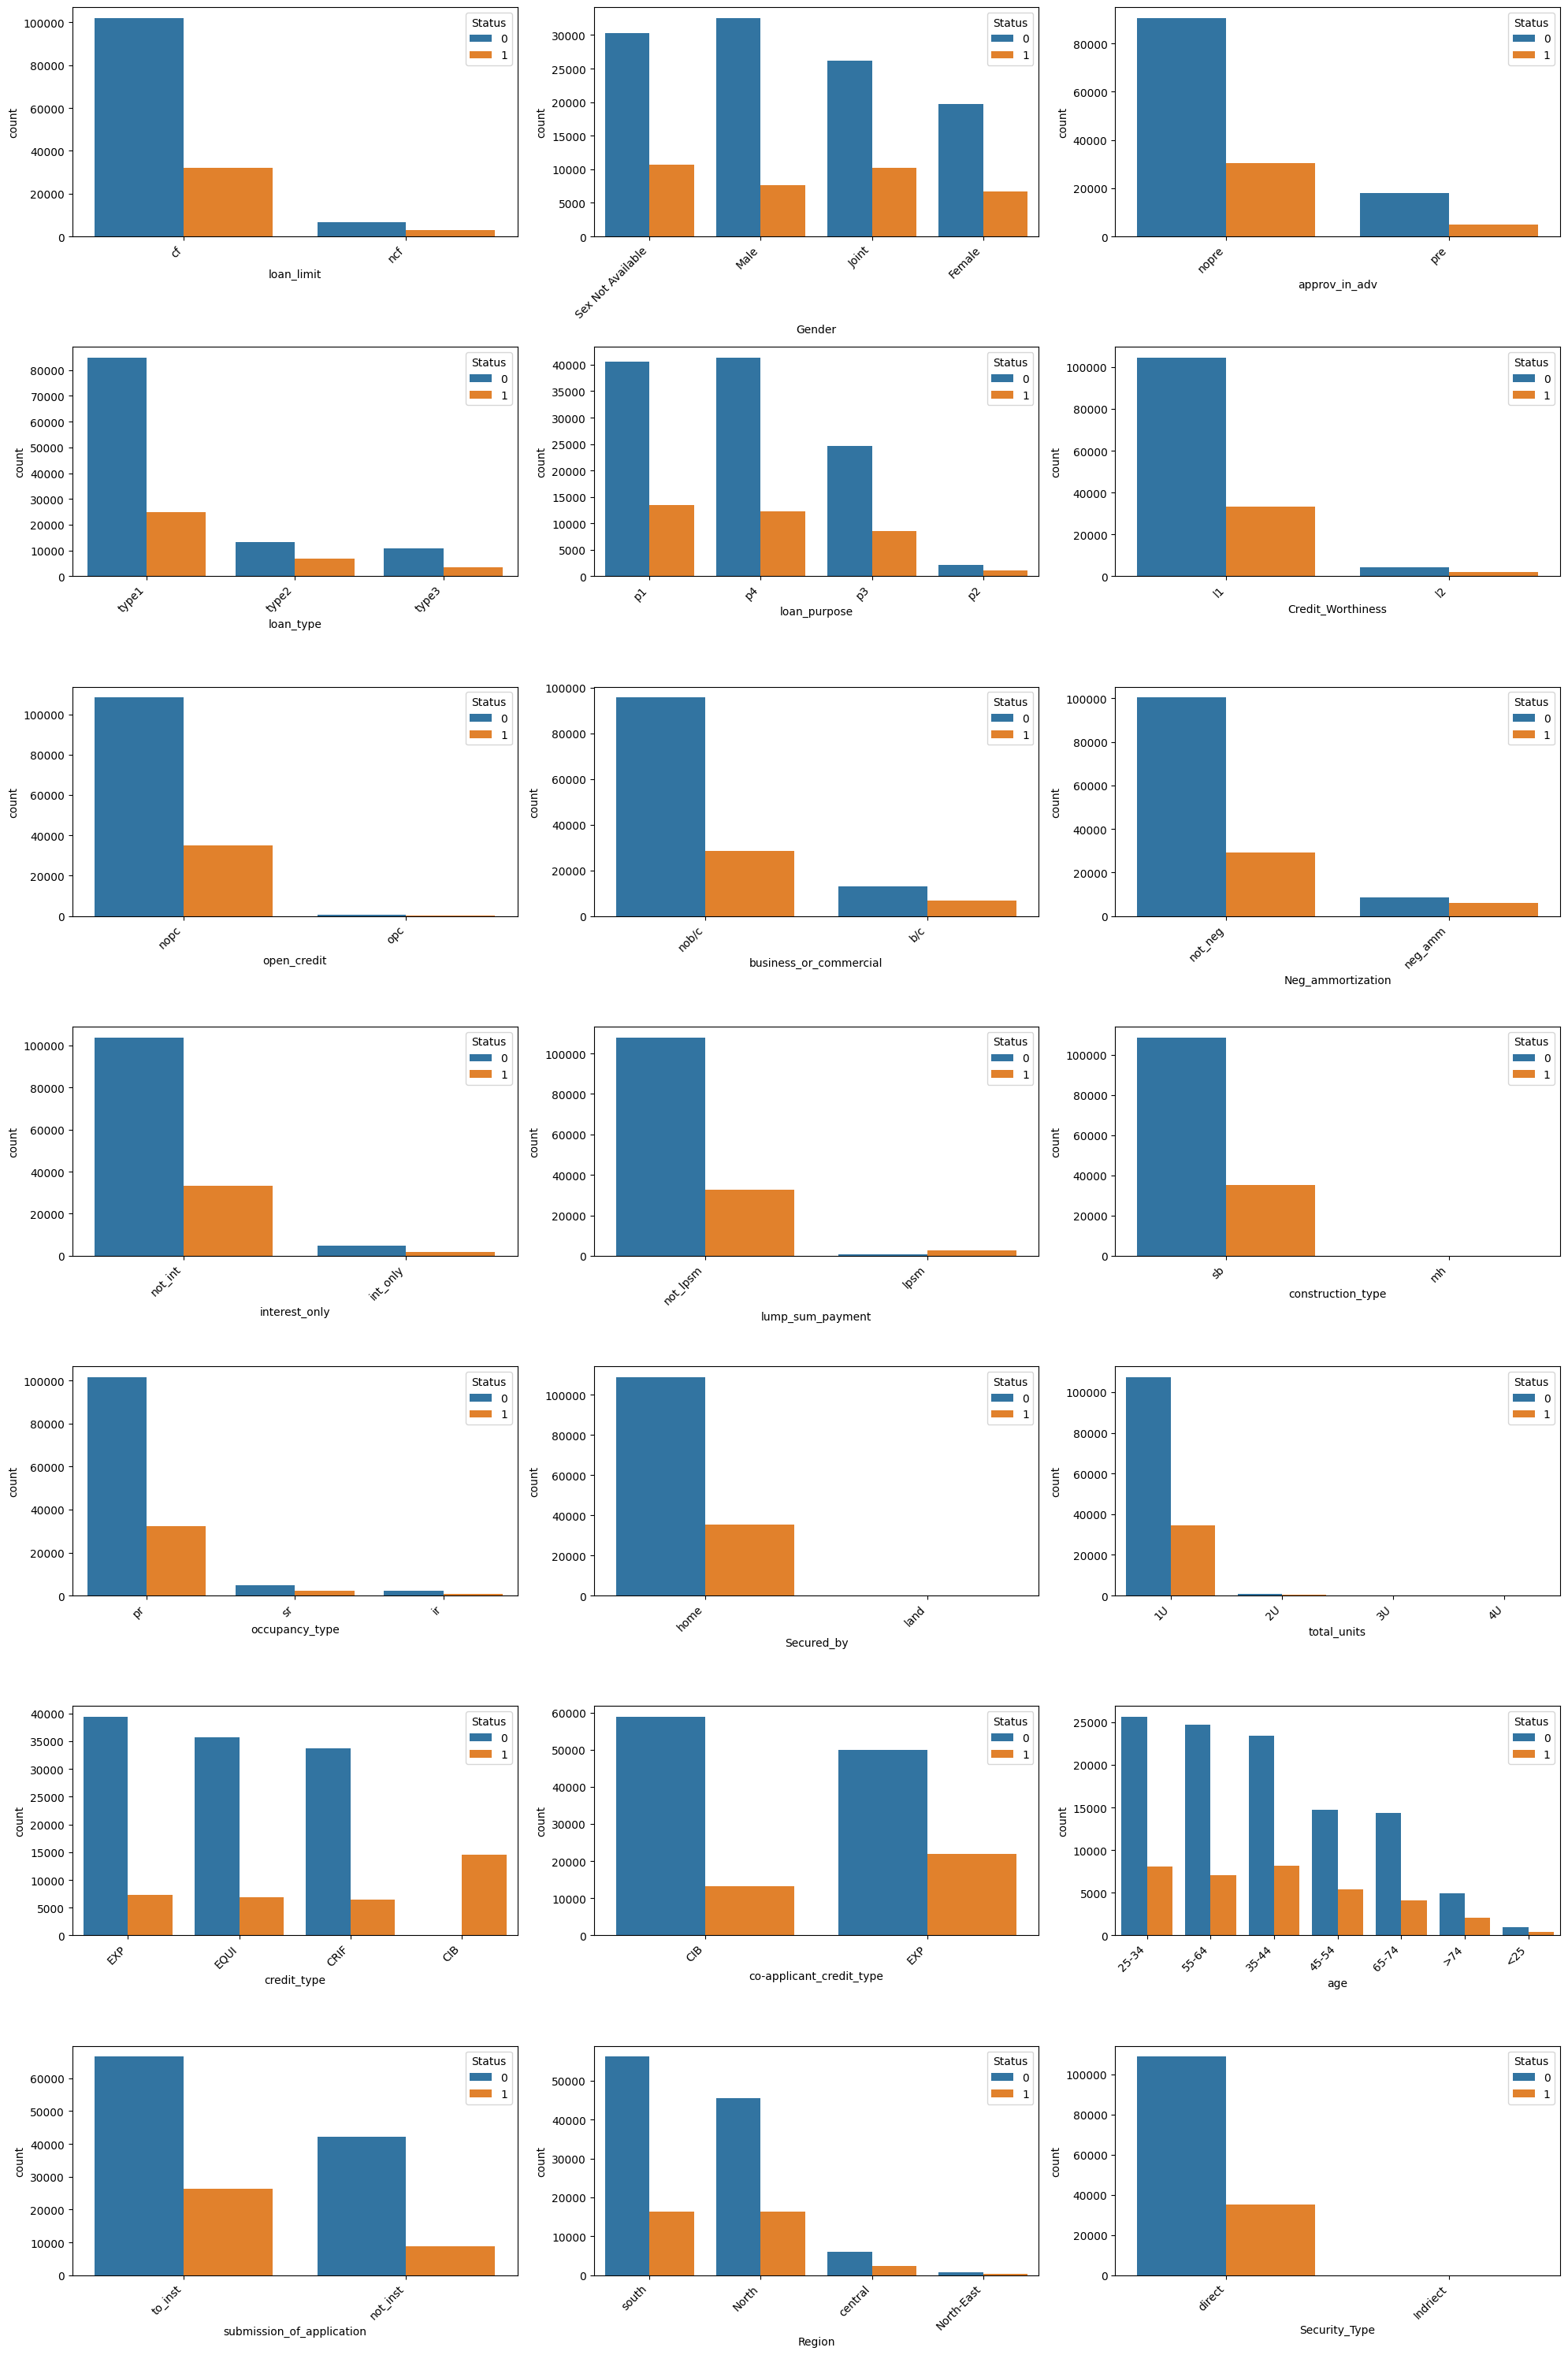

In [17]:
fig, ax = plt.subplots(7,3, figsize = (20,30))

ax = np.ravel(ax)
for i in range(len(categorical_columns)):
  if(categorical_columns[i]!="Status"):
    sns.countplot(data = df, x = categorical_columns[i], ax = ax[i], order = df[categorical_columns[i]].value_counts().index, hue="Status")
  else:
    sns.countplot(data = df, x = categorical_columns[i], ax = ax[i], order = df[categorical_columns[i]].value_counts().index)
  ax[i].set_xticklabels(labels = df[categorical_columns[i]].unique(), rotation=45, ha='right')
ax = np.reshape(ax, (7, 3))
plt.tight_layout()

### Numerical Data

/var/folders/zc/yksx2vr90qs5vcjj1f_x3ts40000gn/T/ipykernel_974/4282449711.py:11: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(ax=axes[i, j], x="Status", y=numeric_columns[column_index],data=df,alpha=.25,palette="Set2")
/var/folders/zc/yksx2vr90qs5vcjj1f_x3ts40000gn/T/ipykernel_974/4282449711.py:11: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(ax=axes[i, j], x="Status", y=numeric_columns[column_index],data=df,alpha=.25,palette="Set2")
/var/folders/zc/yksx2vr90qs5vcjj1f_x3ts40000gn/T/ipykernel_974/4282449711.py:11: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(ax=axes[i, j], x="Status", y=numeric_columns[column_index],data=df,alpha=.25,palette="Set2")
/var/folders/zc/yksx2vr90qs5vcjj1f_x3ts40000gn/T/ipykernel_974/4282449711.py:11: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(ax=axes[i, j], x="Status", y=numeric_columns[

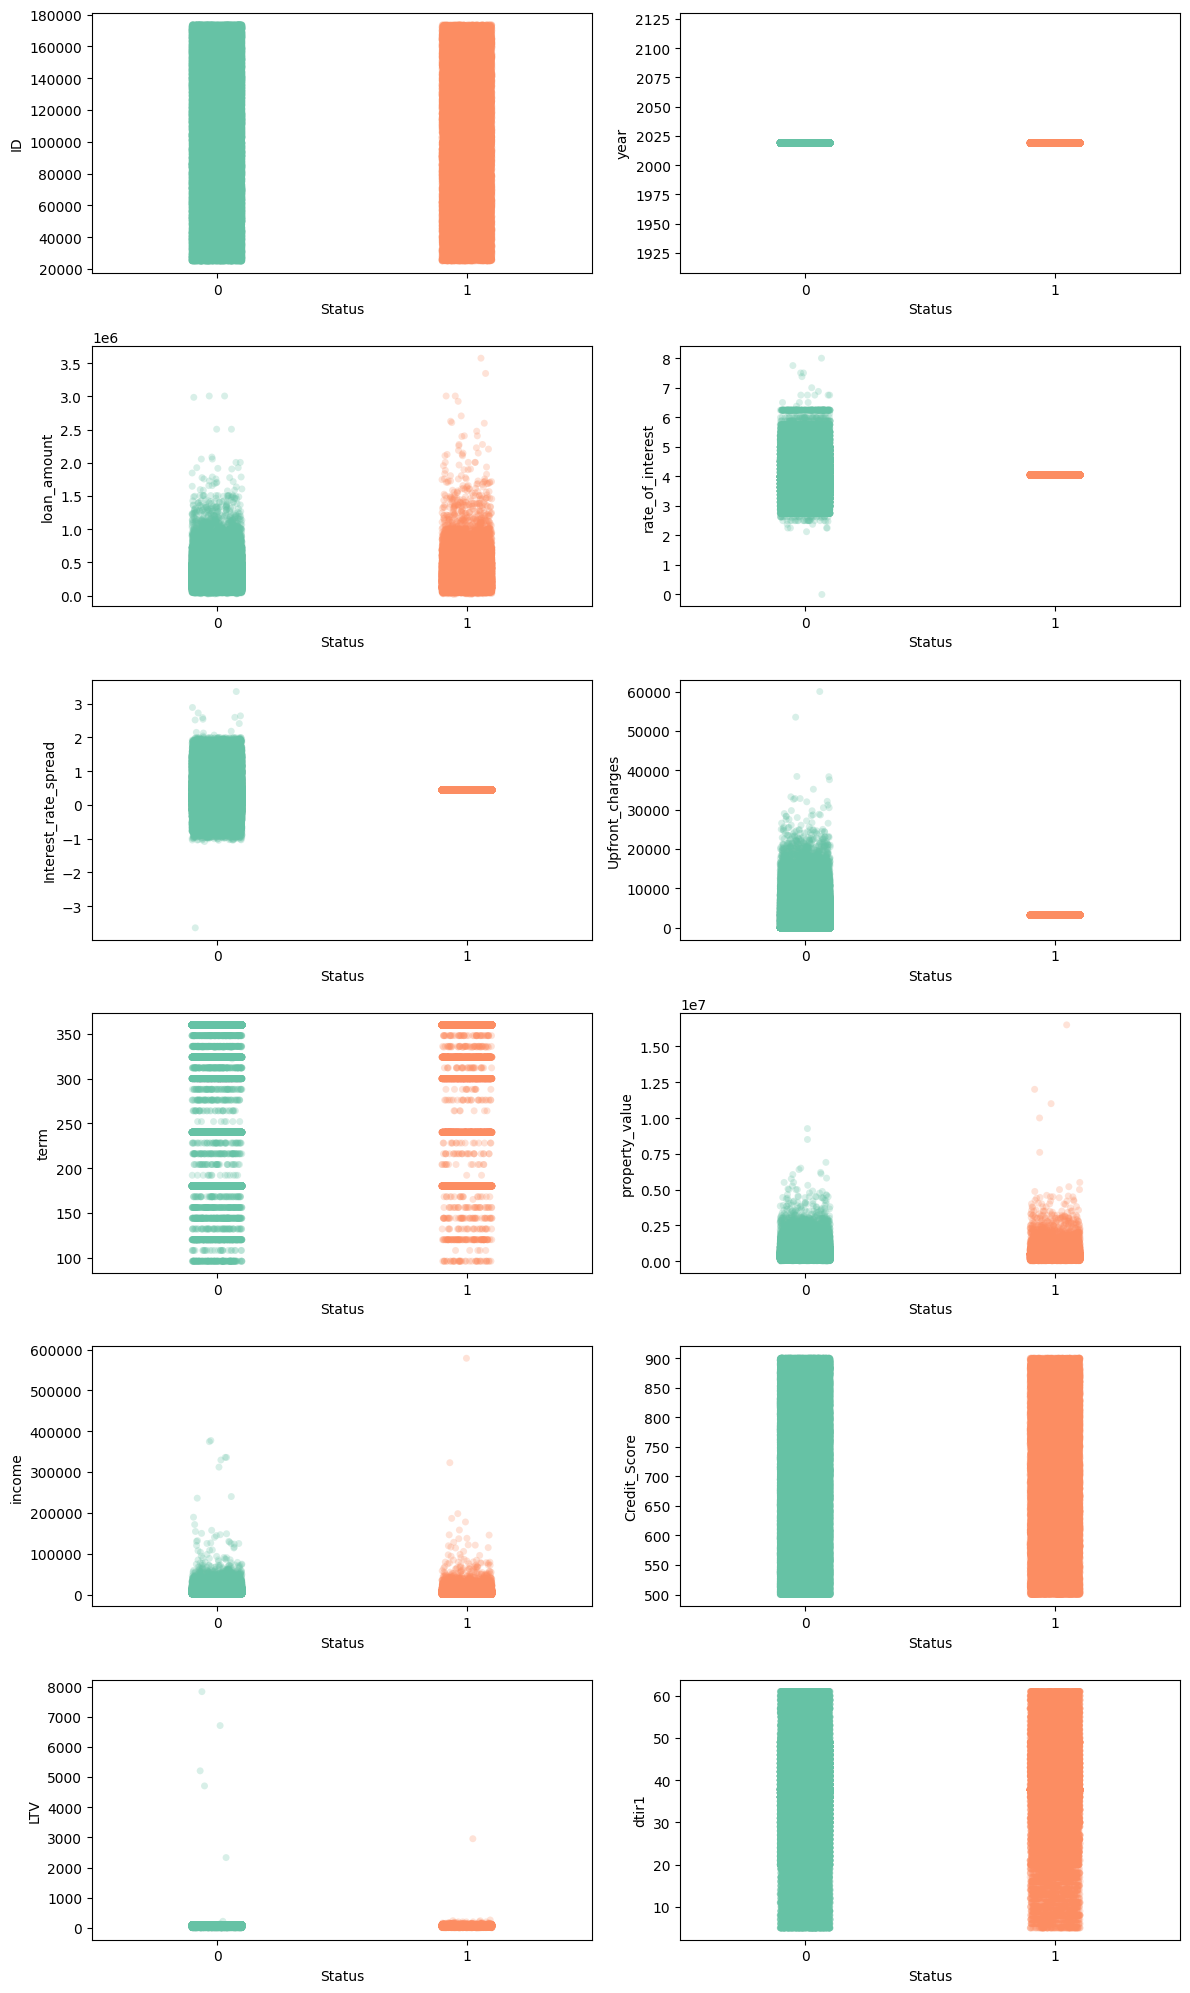

In [18]:
# sns.set_theme(style="ticks", color_codes=True)
fig, axes = plt.subplots(6, 2, figsize=(12, 20))
total_numeric_columns = len(numeric_columns)

column_index = 0

for i in range(0,6):
  for j in range(0,2):
    if(numeric_columns[column_index]=='Status'):
      column_index+=1
    sns.stripplot(ax=axes[i, j], x="Status", y=numeric_columns[column_index],data=df,alpha=.25,palette="Set2")
    column_index+=1
fig.tight_layout()

## Feature Selection: Remove Uncessary Columns

In [19]:
drop_categorical_columns = ['open_credit', 'construction_type','Secured_by','total_units','Security_Type']
categorical_data = categorical_data.drop(drop_categorical_columns, axis=1)
categorical_columns=list(set(categorical_columns) - set(drop_categorical_columns))
categorical_columns

['credit_type',
 'Region',
 'interest_only',
 'business_or_commercial',
 'loan_limit',
 'occupancy_type',
 'Neg_ammortization',
 'approv_in_adv',
 'loan_purpose',
 'loan_type',
 'lump_sum_payment',
 'co-applicant_credit_type',
 'submission_of_application',
 'age',
 'Credit_Worthiness',
 'Gender']

In [20]:
drop_numeric_columns = ['ID','year']
numeric_data = numeric_data.drop(drop_numeric_columns, axis=1)
numeric_columns = list(set(numeric_columns) - set(drop_numeric_columns))
numeric_columns

['rate_of_interest',
 'loan_amount',
 'Upfront_charges',
 'income',
 'Credit_Score',
 'term',
 'Status',
 'LTV',
 'Interest_rate_spread',
 'property_value',
 'dtir1']

### Class imbalance

In [21]:
print(df.groupby('Status').size())
print("Class Imbalance Ratio is:",df.groupby('Status').size()[0]/df.groupby('Status').size()[1])

Status
0    108713
1     35270
dtype: int64
Class Imbalance Ratio is: 3.0823079104054436


## Split dataset into features and labels

In [22]:
len(numeric_columns)

11

In [23]:
len(categorical_columns)

16

In [24]:
X = df.loc[:, df.columns != "Status"].copy()
y = df.loc[:, "Status"].copy()

In [25]:
X.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,45.000000
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,4980.0,EQUI,552,EXP,55-64,to_inst,72.746457,North,direct,37.732932
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,46.000000
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,42.000000
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,39.000000


In [26]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: Status, dtype: int64

In [27]:
X = X.drop(drop_categorical_columns+drop_numeric_columns,axis=1)

In [28]:
X.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,...,occupancy_type,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nob/c,116500,4.045476,0.441656,...,pr,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,45.000000
1,cf,Male,nopre,type2,p1,l1,b/c,206500,4.045476,0.441656,...,pr,4980.0,EQUI,552,EXP,55-64,to_inst,72.746457,North,37.732932
2,cf,Male,pre,type1,p1,l1,nob/c,406500,4.560000,0.200000,...,pr,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,46.000000
3,cf,Male,nopre,type1,p4,l1,nob/c,456500,4.250000,0.681000,...,pr,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,42.000000
4,cf,Joint,pre,type1,p1,l1,nob/c,696500,4.000000,0.304200,...,pr,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,39.000000


## Feature Selection using Correlation

/var/folders/zc/yksx2vr90qs5vcjj1f_x3ts40000gn/T/ipykernel_974/1328652683.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationMatrix = correlation_df.corr(method='pearson', min_periods = 1).round(2)


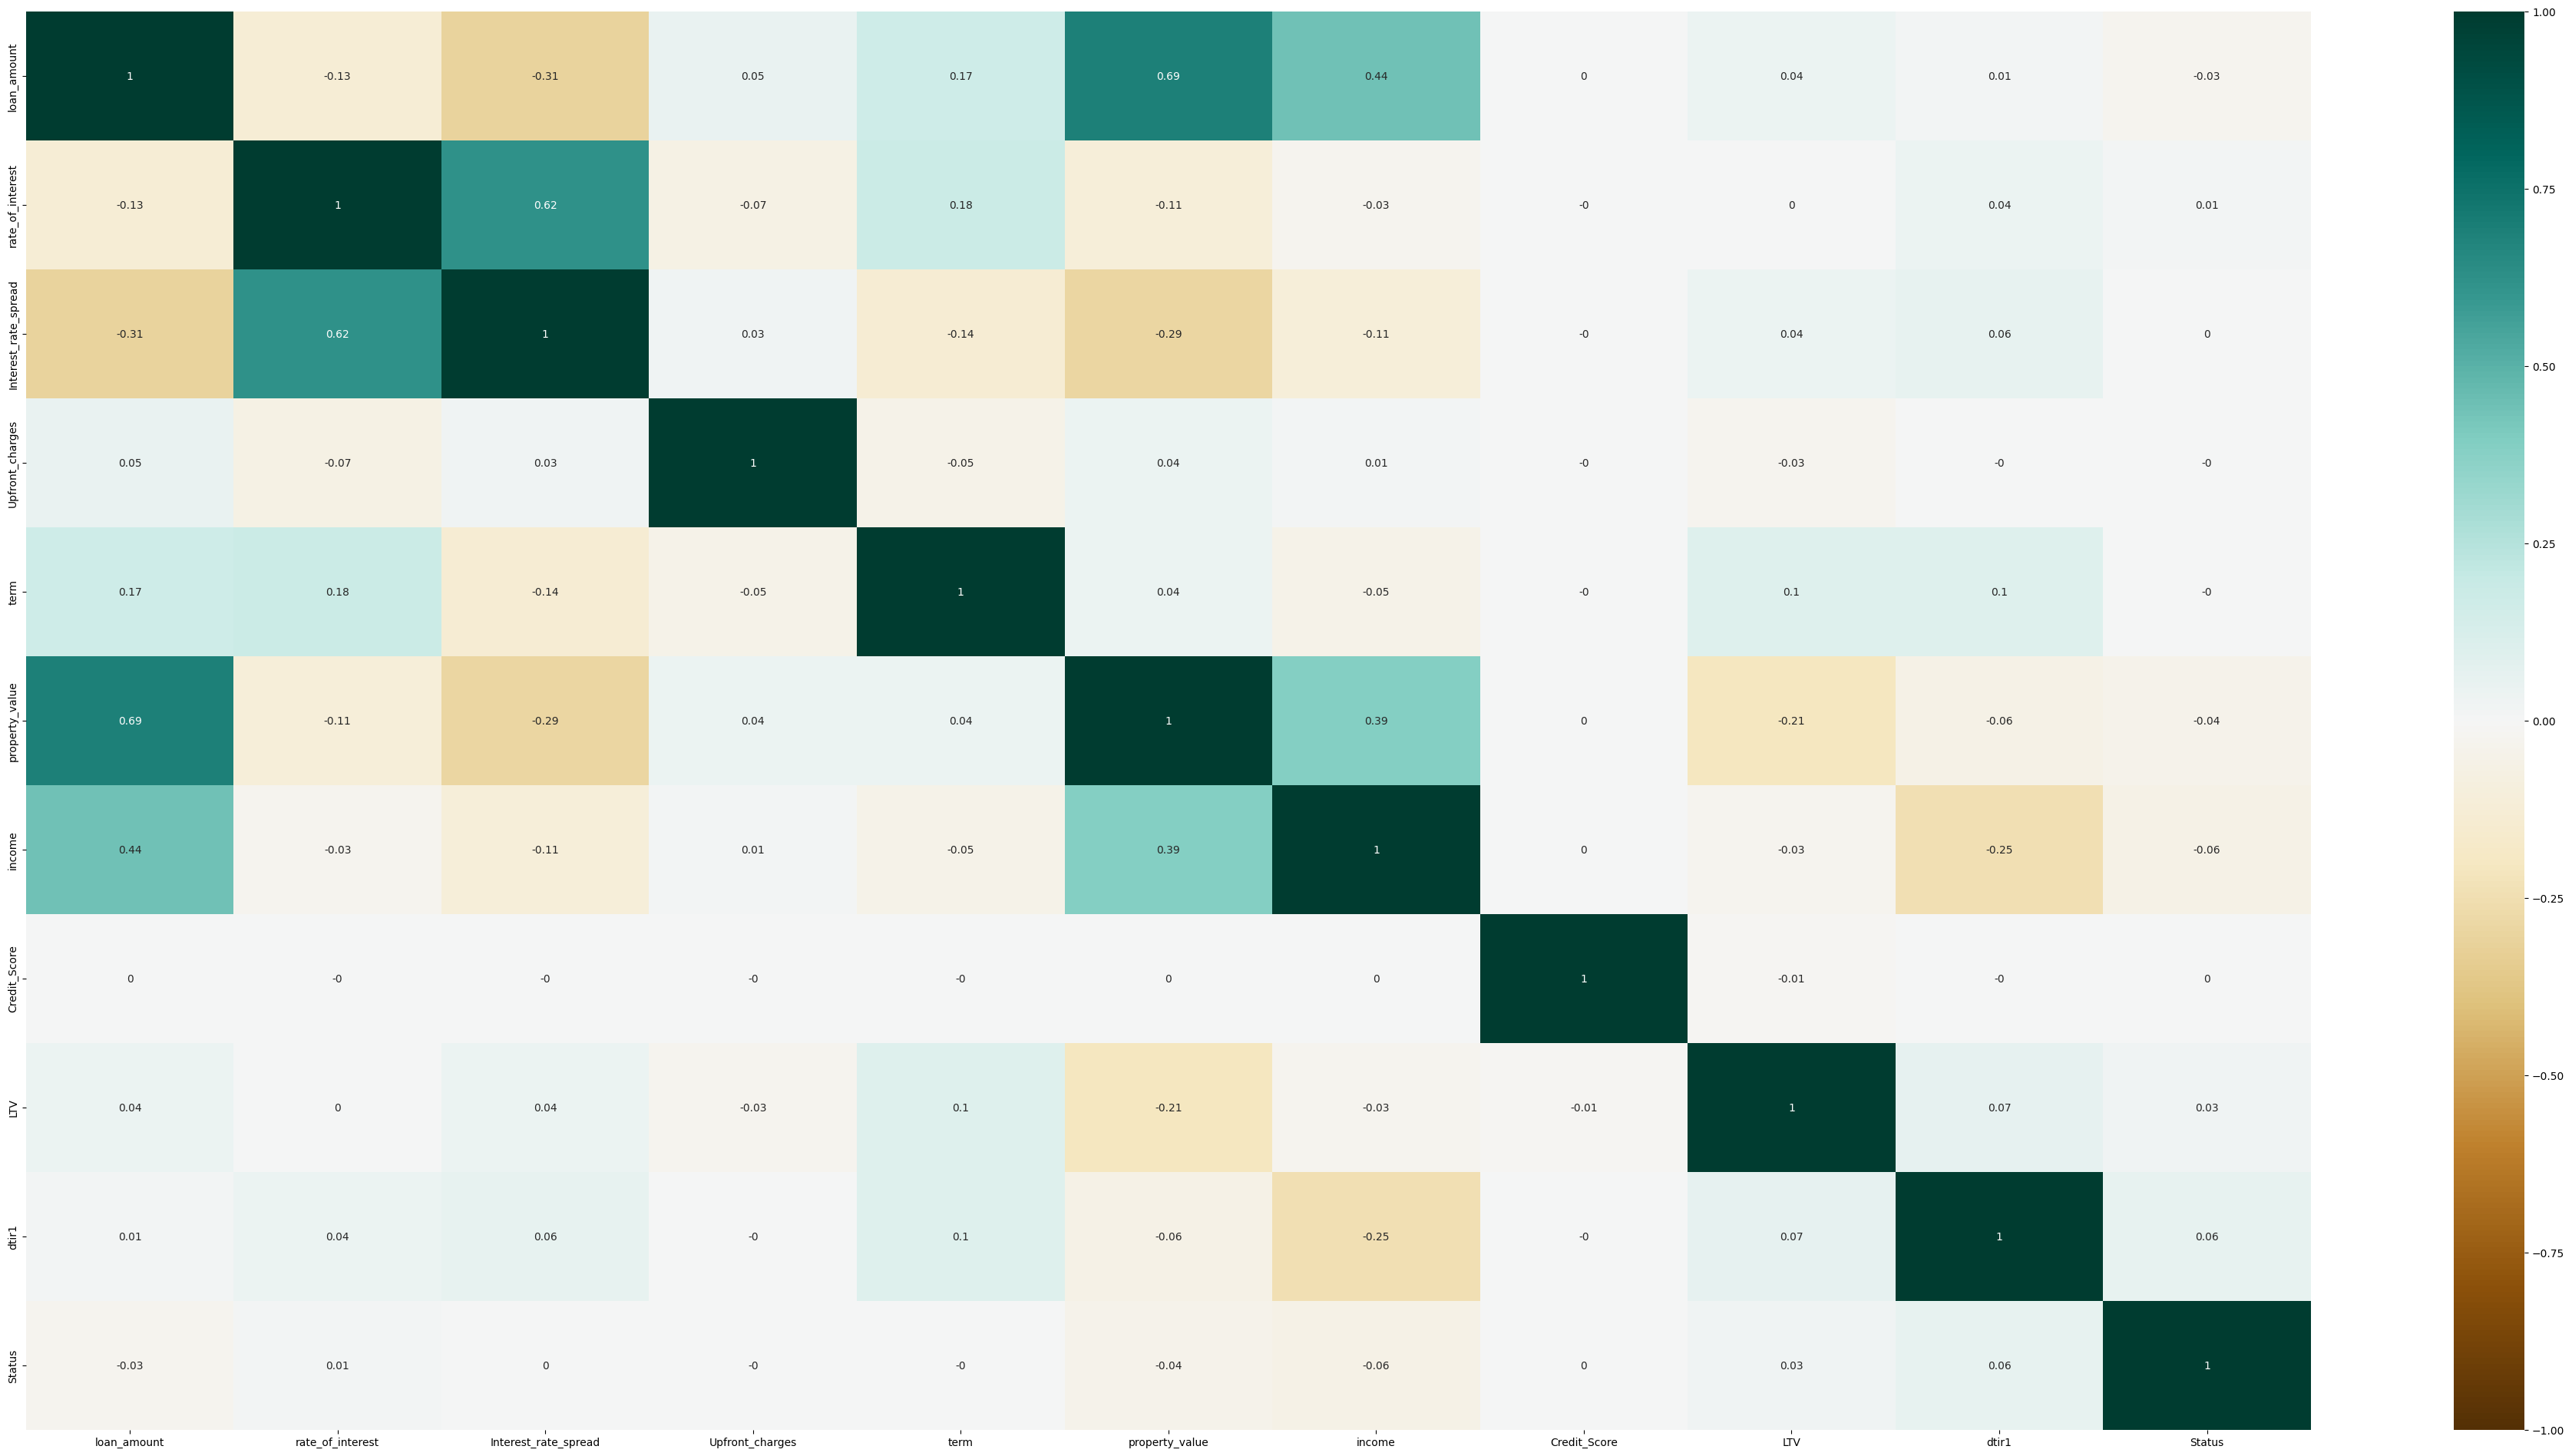

In [29]:
correlation_df = pd.concat([X, y], axis=1).assign(Status=y)
correlationMatrix = correlation_df.corr(method='pearson', min_periods = 1).round(2)

plt.figure(figsize=(48, 24))
sns.heatmap(correlationMatrix, annot=True, vmax=1, vmin=-1, center=0, cmap='BrBG')
plt.show()

In [30]:
correlationMatrixUnstacked = correlationMatrix.unstack()
strongCorrelationMatrix = correlationMatrixUnstacked[abs(correlationMatrixUnstacked) >= 0.7]
strongCorrelationMatrix

loan_amount           loan_amount             1.0
rate_of_interest      rate_of_interest        1.0
Interest_rate_spread  Interest_rate_spread    1.0
Upfront_charges       Upfront_charges         1.0
term                  term                    1.0
property_value        property_value          1.0
income                income                  1.0
Credit_Score          Credit_Score            1.0
LTV                   LTV                     1.0
dtir1                 dtir1                   1.0
Status                Status                  1.0
dtype: float64

In [31]:
numeric_columns

['rate_of_interest',
 'loan_amount',
 'Upfront_charges',
 'income',
 'Credit_Score',
 'term',
 'Status',
 'LTV',
 'Interest_rate_spread',
 'property_value',
 'dtir1']

### Independence between Target variable and Independent variable

In [32]:
zeroCorrelation = correlationMatrix["Status"]
zeroCorrelation[zeroCorrelation==0]

Interest_rate_spread    0.0
Upfront_charges        -0.0
term                   -0.0
Credit_Score            0.0
Name: Status, dtype: float64

In [33]:
# There is no correlation between Interest_rate_spread,Upfront_charges,term, Credit_Score

X = X.drop(["Interest_rate_spread","Upfront_charges","term", "Credit_Score"], axis=1)
numeric_columns.remove("Interest_rate_spread")
numeric_columns.remove("Upfront_charges")
numeric_columns.remove("term")
numeric_columns.remove("Credit_Score")

In [34]:
X.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,business_or_commercial,loan_amount,rate_of_interest,Neg_ammortization,...,property_value,occupancy_type,income,credit_type,co-applicant_credit_type,age,submission_of_application,LTV,Region,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nob/c,116500,4.045476,not_neg,...,118000.000000,pr,1740.0,EXP,CIB,25-34,to_inst,98.728814,south,45.000000
1,cf,Male,nopre,type2,p1,l1,b/c,206500,4.045476,not_neg,...,497893.465696,pr,4980.0,EQUI,EXP,55-64,to_inst,72.746457,North,37.732932
2,cf,Male,pre,type1,p1,l1,nob/c,406500,4.560000,neg_amm,...,508000.000000,pr,9480.0,EXP,CIB,35-44,to_inst,80.019685,south,46.000000
3,cf,Male,nopre,type1,p4,l1,nob/c,456500,4.250000,not_neg,...,658000.000000,pr,11880.0,EXP,CIB,45-54,not_inst,69.376900,North,42.000000
4,cf,Joint,pre,type1,p1,l1,nob/c,696500,4.000000,not_neg,...,758000.000000,pr,10440.0,CRIF,EXP,25-34,not_inst,91.886544,North,39.000000


### Chi Square Test

In [35]:
for i in range(len(categorical_columns)):
  crosstab = pd.crosstab(df[categorical_columns[i]],df["Status"])
  val = stats.chi2_contingency(crosstab)
  print("P-Value for "+categorical_columns[i] +" and Status: "+ str(val[1]))

P-Value for credit_type and Status: 0.0
P-Value for Region and Status: 1.073773271526854e-73
P-Value for interest_only and Status: 1.9604059350040553e-14
P-Value for business_or_commercial and Status: 3.752495058492491e-250
P-Value for loan_limit and Status: 7.754640543771739e-71
P-Value for occupancy_type and Status: 2.102578086253287e-30
P-Value for Neg_ammortization and Status: 0.0
P-Value for approv_in_adv and Status: 8.04426852421324e-41
P-Value for loan_purpose and Status: 1.1897696700564854e-49
P-Value for loan_type and Status: 7.150036323718608e-256
P-Value for lump_sum_payment and Status: 0.0
P-Value for co-applicant_credit_type and Status: 0.0
P-Value for submission_of_application and Status: 0.0
P-Value for age and Status: 4.8170041175363515e-76
P-Value for Credit_Worthiness and Status: 3.474952357188161e-43
P-Value for Gender and Status: 7.94905475712565e-210


## Encoding Features using OneHotEncoder
Encode categorical features as a one-hot numeric array.

The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are encoded using a one-hot (aka ‘one-of-K’ or ‘dummy’) encoding scheme. This creates a binary column for each category and returns a sparse matrix or dense array (depending on the sparse parameter)

In [36]:
categorical_columns = list(X.select_dtypes(include="object").columns)
X[categorical_columns].describe()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,business_or_commercial,Neg_ammortization,interest_only,lump_sum_payment,occupancy_type,credit_type,co-applicant_credit_type,age,submission_of_application,Region
count,143983,143983,143983,143983,143983,143983,143983,143983,143983,143983,143983,143983,143983,143983,143983,143983
unique,2,4,2,3,4,2,2,2,2,2,3,4,2,7,2,4
top,cf,Male,nopre,type1,p3,l1,nob/c,not_neg,not_int,not_lpsm,pr,CIB,CIB,45-54,to_inst,North
freq,134224,40995,121038,109694,54102,137671,124068,129597,137157,140599,133903,46738,72056,33688,92914,72427


In [37]:
total_cols = 0
for col in categorical_columns:
  print(col, X[col].unique(),'\n',sep='\n',end='\n')
  total_cols += len(X[col].unique())

loan_limit
['cf' 'ncf']


Gender
['Sex Not Available' 'Male' 'Joint' 'Female']


approv_in_adv
['nopre' 'pre']


loan_type
['type1' 'type2' 'type3']


loan_purpose
['p1' 'p4' 'p3' 'p2']


Credit_Worthiness
['l1' 'l2']


business_or_commercial
['nob/c' 'b/c']


Neg_ammortization
['not_neg' 'neg_amm']


interest_only
['not_int' 'int_only']


lump_sum_payment
['not_lpsm' 'lpsm']


occupancy_type
['pr' 'sr' 'ir']


credit_type
['EXP' 'EQUI' 'CRIF' 'CIB']


co-applicant_credit_type
['CIB' 'EXP']


age
['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25']


submission_of_application
['to_inst' 'not_inst']


Region
['south' 'North' 'central' 'North-East']




In [38]:
expected_col_after_transformation = total_cols
print("Expected columns after transformation without dropping first:", X.shape[1] + total_cols - len(categorical_columns))

Expected columns after transformation without dropping first: 53


In [39]:
X.shape

(143983, 22)

In [40]:
transformer = make_column_transformer(
    (preprocessing.OneHotEncoder(drop='first'), categorical_columns),
    remainder='passthrough')

In [41]:
transformed = transformer.fit_transform(X)
transformed_X = pd.DataFrame(transformed, columns=transformer.get_feature_names())
transformed_X.describe()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,onehotencoder__x0_ncf,onehotencoder__x1_Joint,onehotencoder__x1_Male,onehotencoder__x1_Sex Not Available,onehotencoder__x2_pre,onehotencoder__x3_type2,onehotencoder__x3_type3,onehotencoder__x4_p2,onehotencoder__x4_p3,onehotencoder__x4_p4,...,onehotencoder__x14_to_inst,onehotencoder__x15_North-East,onehotencoder__x15_central,onehotencoder__x15_south,loan_amount,rate_of_interest,property_value,income,LTV,dtir1
count,143983.000000,143983.000000,143983.000000,143983.000000,143983.000000,143983.000000,143983.000000,143983.000000,143983.000000,143983.000000,...,143983.000000,143983.000000,143983.000000,143983.000000,1.439830e+05,143983.000000,1.439830e+05,143983.000000,143983.000000,143983.000000
mean,0.067779,0.279200,0.284721,0.252690,0.159359,0.138315,0.099831,0.021878,0.375753,0.371898,...,0.645312,0.008383,0.058396,0.430197,3.317719e+05,4.041176,4.993184e+05,6962.776659,72.694994,37.722528
std,0.251367,0.448607,0.451283,0.434556,0.366012,0.345231,0.299776,0.146284,0.484318,0.483313,...,0.478420,0.091174,0.234491,0.495105,1.842255e+05,0.489278,3.424070e+05,6296.435038,38.360465,9.655789
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.650000e+04,0.000000,8.000000e+03,0.000000,0.967478,5.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.965000e+05,3.750000,2.880000e+05,3840.000000,63.141809,33.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,2.965000e+05,4.045476,4.580000e+05,6000.000000,72.928994,37.732932
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,4.365000e+05,4.250000,5.980000e+05,8280.000000,84.574468,44.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,3.576500e+06,8.000000,1.650800e+07,578580.000000,7831.250000,61.000000


In [42]:
X = transformed_X
X.head()

,onehotencoder__x0_ncf,onehotencoder__x1_Joint,onehotencoder__x1_Male,onehotencoder__x1_Sex Not Available,onehotencoder__x2_pre,onehotencoder__x3_type2,onehotencoder__x3_type3,onehotencoder__x4_p2,onehotencoder__x4_p3,onehotencoder__x4_p4,...,onehotencoder__x14_to_inst,onehotencoder__x15_North-East,onehotencoder__x15_central,onehotencoder__x15_south,loan_amount,rate_of_interest,property_value,income,LTV,dtir1
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,116500.0,4.045476,118000.000000,1740.0,98.728814,45.000000
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,206500.0,4.045476,497893.465696,4980.0,72.746457,37.732932
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,406500.0,4.560000,508000.000000,9480.0,80.019685,46.000000
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,456500.0,4.250000,658000.000000,11880.0,69.376900,42.000000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,696500.0,4.000000,758000.000000,10440.0,91.886544,39.000000


In [43]:
y

0         1
1         1
2         0
3         0
4         0
         ..
148665    0
148666    0
148667    0
148668    0
148669    0
Name: Status, Length: 143983, dtype: int64

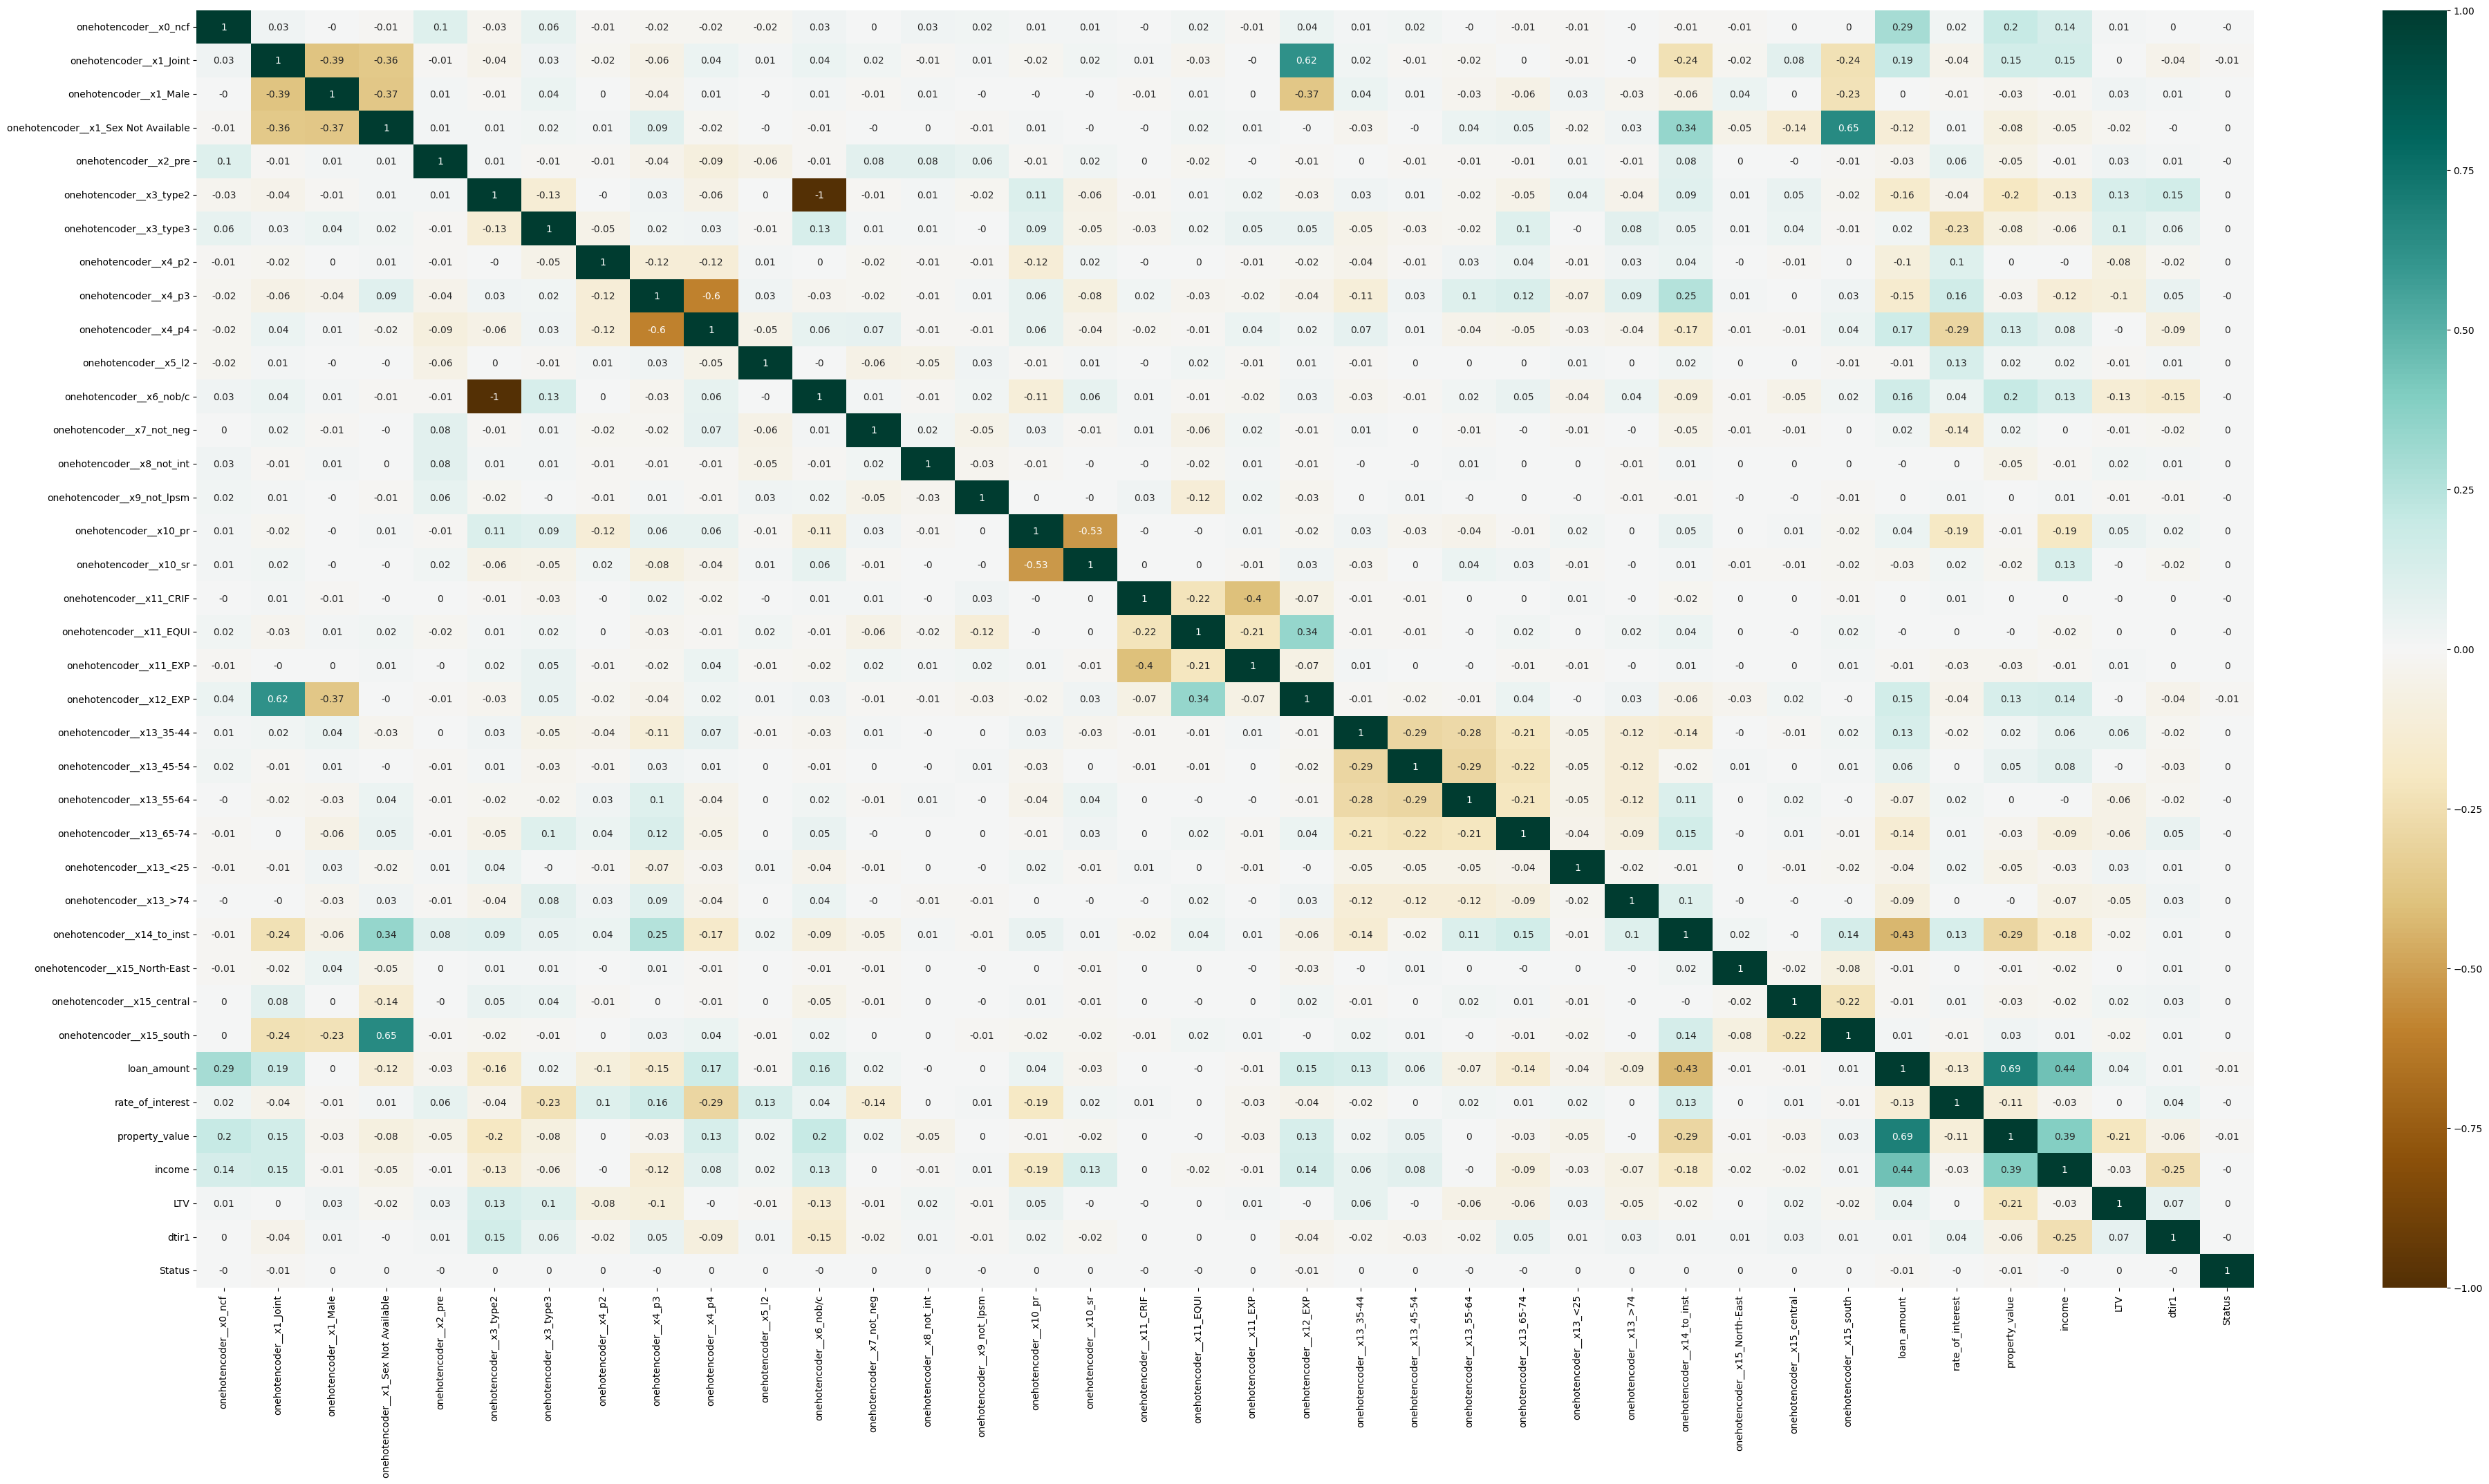

In [44]:
correlation_df = pd.concat([X, y], axis=1).assign(Status=y)
correlationMatrix = correlation_df.corr(method='pearson', min_periods = 1).round(2)

plt.figure(figsize=(48, 24))
sns.heatmap(correlationMatrix, annot=True, vmax=1, vmin=-1, center=0, cmap='BrBG')
plt.show()

In [45]:
X = X.drop(['onehotencoder__x6_nob/c'], axis=1)
X.describe()

,onehotencoder__x0_ncf,onehotencoder__x1_Joint,onehotencoder__x1_Male,onehotencoder__x1_Sex Not Available,onehotencoder__x2_pre,onehotencoder__x3_type2,onehotencoder__x3_type3,onehotencoder__x4_p2,onehotencoder__x4_p3,onehotencoder__x4_p4,...,onehotencoder__x14_to_inst,onehotencoder__x15_North-East,onehotencoder__x15_central,onehotencoder__x15_south,loan_amount,rate_of_interest,property_value,income,LTV,dtir1
count,143983.000000,143983.000000,143983.000000,143983.000000,143983.000000,143983.000000,143983.000000,143983.000000,143983.000000,143983.000000,...,143983.000000,143983.000000,143983.000000,143983.000000,1.439830e+05,143983.000000,1.439830e+05,143983.000000,143983.000000,143983.000000
mean,0.067779,0.279200,0.284721,0.252690,0.159359,0.138315,0.099831,0.021878,0.375753,0.371898,...,0.645312,0.008383,0.058396,0.430197,3.317719e+05,4.041176,4.993184e+05,6962.776659,72.694994,37.722528
std,0.251367,0.448607,0.451283,0.434556,0.366012,0.345231,0.299776,0.146284,0.484318,0.483313,...,0.478420,0.091174,0.234491,0.495105,1.842255e+05,0.489278,3.424070e+05,6296.435038,38.360465,9.655789
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.650000e+04,0.000000,8.000000e+03,0.000000,0.967478,5.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.965000e+05,3.750000,2.880000e+05,3840.000000,63.141809,33.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,2.965000e+05,4.045476,4.580000e+05,6000.000000,72.928994,37.732932
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,4.365000e+05,4.250000,5.980000e+05,8280.000000,84.574468,44.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,3.576500e+06,8.000000,1.650800e+07,578580.000000,7831.250000,61.000000


## Split dataset for training and testing

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
X_train

,onehotencoder__x0_ncf,onehotencoder__x1_Joint,onehotencoder__x1_Male,onehotencoder__x1_Sex Not Available,onehotencoder__x2_pre,onehotencoder__x3_type2,onehotencoder__x3_type3,onehotencoder__x4_p2,onehotencoder__x4_p3,onehotencoder__x4_p4,...,onehotencoder__x14_to_inst,onehotencoder__x15_North-East,onehotencoder__x15_central,onehotencoder__x15_south,loan_amount,rate_of_interest,property_value,income,LTV,dtir1
143007,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,546500.0,3.990000,7.880000e+05,6720.000000,69.352792,41.000000
80829,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,366500.0,3.625000,3.780000e+05,6957.338876,96.957672,37.732932
28721,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,416500.0,3.875000,5.280000e+05,8040.000000,78.882576,42.000000
107891,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,446500.0,4.045476,4.978935e+05,5280.000000,72.746457,37.732932
9932,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,706500.0,4.045476,9.480000e+05,18540.000000,74.525316,21.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,556500.0,4.045476,1.658000e+06,14400.000000,33.564536,22.000000
119879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,86500.0,4.750000,9.800000e+04,1560.000000,88.265306,43.000000
103694,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,406500.0,3.875000,4.980000e+05,8520.000000,81.626506,37.000000
131932,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,426500.0,4.250000,5.080000e+05,5040.000000,83.956693,39.000000


In [68]:
featurenames = X_train.columns

## Feature Scaling using StandardScaler

In [69]:
numeric_columns = list(X_train.select_dtypes(include=np.number).columns)
column_transformer = ColumnTransformer([('numerical',preprocessing.StandardScaler(),numeric_columns)], remainder='passthrough')

X_train = column_transformer.fit_transform(X_train)
X_test = column_transformer.transform(X_test)

In [70]:
X_train

array([[ 3.69307189e+00, -6.22418269e-01,  1.58381702e+00, ...,
        -3.78165693e-02, -9.26107567e-02,  3.40424982e-01],
       [-2.70777291e-01, -6.22418269e-01, -6.31386068e-01, ...,
        -7.02718062e-04,  6.77631631e-01,  1.41824558e-03],
       [-2.70777291e-01, -6.22418269e-01,  1.58381702e+00, ...,
         1.68598344e-01,  1.73293079e-01,  4.44189819e-01],
       ...,
       [-2.70777291e-01, -6.22418269e-01,  1.58381702e+00, ...,
         2.43658313e-01,  2.49855317e-01, -7.46343678e-02],
       [-2.70777291e-01, -6.22418269e-01, -6.31386068e-01, ...,
        -3.00526459e-01,  3.14873122e-01,  1.32895307e-01],
       [-2.70777291e-01, -6.22418269e-01, -6.31386068e-01, ...,
        -5.82001341e-01,  2.08065205e-03,  1.41824558e-03]])

## Model Fitting

### Selected Models

1. Gaussian Naive Bayes
2. KNN
3. Logistic Regression
4. Decision Trees
5. SVM


In [50]:
def ROC(label, result):
    # Compute ROC curve and area the curve
    Y = np.array(label)
    fpr, tpr, thresholds = roc_curve(Y, result)
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)

    # Plot ROC curve
    # plt.clf()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return roc_auc

In [51]:
#result should be y_pred obtained after predict_proba
def pr_curve(label, result):
  average_precision = average_precision_score(label, result)

  precision, recall, _ = precision_recall_curve(label, result)

  plt.step(recall, precision, color='b', alpha=0.2,
          where='post')
  plt.fill_between(recall, precision, step='post', alpha=0.2,
                  color='b')

  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
            average_precision))
  plt.show()
  return average_precision

### Gaussian Naive Bayes

Best Params: {'var_smoothing': 1e-30}
Best Score: 0.9984720696574458
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32537
           1       1.00      1.00      1.00     10658

    accuracy                           1.00     43195
   macro avg       1.00      1.00      1.00     43195
weighted avg       1.00      1.00      1.00     43195

[[32537     0]
 [    3 10655]]
Recall -  0.9997185212985551
Precision -  1.0
Accuracy -  0.9999305475170738
F1 Score -  0.9998592408389246
Area under the ROC curve : 0.999953


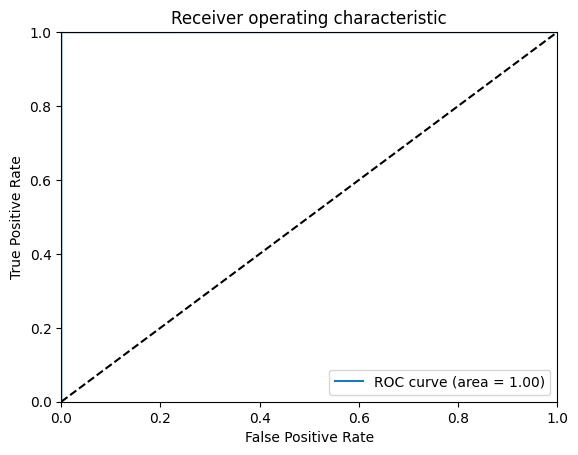

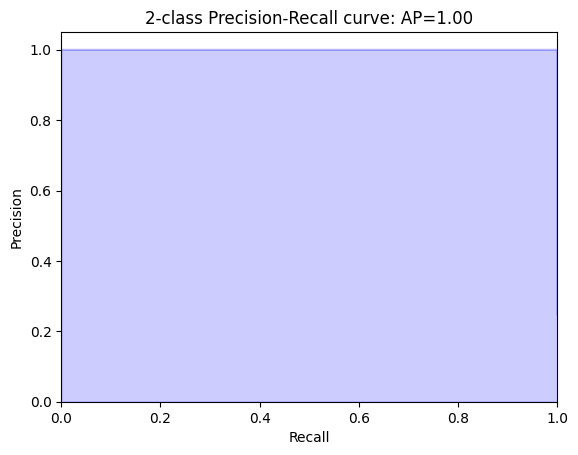

In [52]:

NBclassifier2 = GaussianNB()

grid_search = GridSearchCV(NBclassifier2, {
      "var_smoothing":[1e-30,1e-25,1e-20,1e-15, 1e-13, 1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5]
    }, cv=10, scoring='accuracy')

grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)

print("Best Params:",grid_search.best_params_)
print("Best Score:",grid_search.best_score_)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# NBAcc2 = accuracy_score(y_test, y_pred)
# print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# plot_confusion_matrix(cm,[0,1])

true_positives = cm[1,1]
false_positives = cm[0,1]
true_negatives = cm[0,0]
false_negatives = cm[1,0]

recall = true_positives/(true_positives + false_negatives)
print("Recall - ", recall)

precision = true_positives/(true_positives + false_positives)
print("Precision - ", precision)

acc = (true_positives + true_negatives)/(true_positives + false_negatives + false_positives + true_negatives)
print("Accuracy - ", acc)

f1_score = (2 * precision * recall)/(precision + recall)
print("F1 Score - ", f1_score)

y_score = grid_search.predict_proba(X_test)[:, 1]
roc_area = ROC(y_test, y_score)
pr_area = pr_curve(y_test, y_score)

### K Nearest Neighbors

Best Params: {'n_neighbors': 17, 'weights': 'distance'}
Best Score: 0.8693098476493212
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     32537
           1       0.92      0.51      0.66     10658

    accuracy                           0.87     43195
   macro avg       0.89      0.75      0.79     43195
weighted avg       0.87      0.87      0.85     43195

[[32061   476]
 [ 5219  5439]]
Recall -  0.5103208857196472
Precision -  0.919526627218935
Accuracy -  0.8681560365783076
F1 Score -  0.6563687926144934
Area under the ROC curve : 0.874569


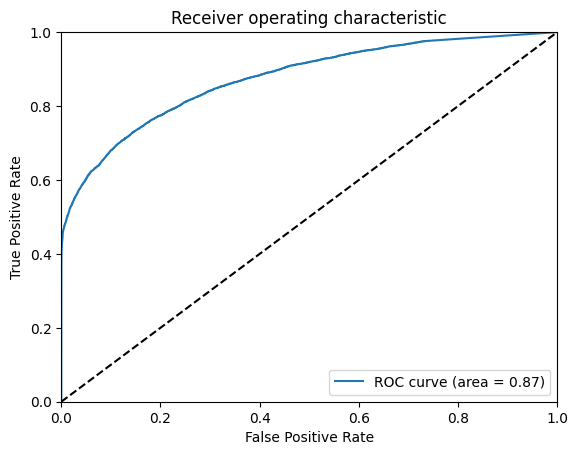

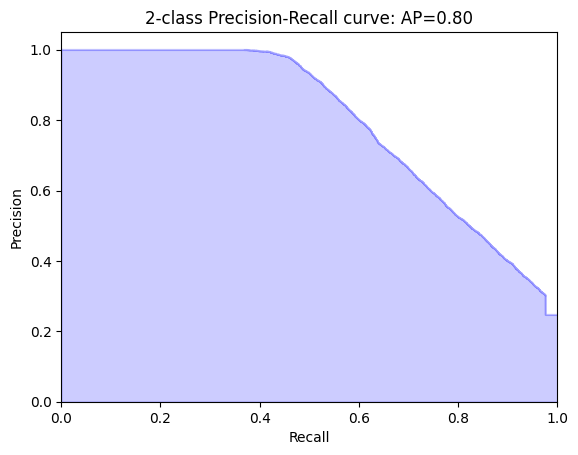

In [53]:
knn = KNeighborsClassifier()

 
grid = GridSearchCV(knn, {
      "n_neighbors": [5, 7, 10, 13, 15, 17, 19, 21, 23],
      "weights":["uniform","distance"],
      # "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute']
    }, cv=5)
  
grid_search=grid.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)

print("Best Params:",grid_search.best_params_)
print("Best Score:",grid_search.best_score_)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# plot_confusion_matrix(cm,[0,1])

true_positives = cm[1,1]
false_positives = cm[0,1]
true_negatives = cm[0,0]
false_negatives = cm[1,0]

recall = true_positives/(true_positives + false_negatives)
print("Recall - ", recall)

precision = true_positives/(true_positives + false_positives)
print("Precision - ", precision)

acc = (true_positives + true_negatives)/(true_positives + false_negatives + false_positives + true_negatives)
print("Accuracy - ", acc)

f1_score = (2 * precision * recall)/(precision + recall)
print("F1 Score - ", f1_score)

y_score = grid_search.predict_proba(X_test)[:, 1]
roc_area = ROC(y_test, y_score)
pr_area = pr_curve(y_test, y_score) 

In [55]:
print(grid_search.best_score_)   

y_pred = grid_search.predict(X_test)

knnacc = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(knnacc*100))

0.8693098476493212
Gaussian Naive Bayes accuracy: 86.82%


In [56]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import classification_report
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix

ypred = grid_search.predict(X_test)
print(classification_report(y_test, ypred))
print(confusion_matrix(y_test, ypred))
KNNAcc = accuracy_score(ypred,y_test)
print('KNN accuracy: {:.2f}%'.format(KNNAcc*100))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     32537
           1       0.92      0.51      0.66     10658

    accuracy                           0.87     43195
   macro avg       0.89      0.75      0.79     43195
weighted avg       0.87      0.87      0.85     43195

[[32061   476]
 [ 5219  5439]]
KNN accuracy: 86.82%


## Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [58]:
C_vals = np.array([1e-6, 1e-5, 1e-4, 1e-3, 1, 1e2, 1e3, 1e4, 1e5, 1e6])

In [59]:
for currentC in C_vals:
    currentLR = LogisticRegression(solver='sag', max_iter=100000,C=currentC)
    currentLR.fit(X_train, y_train)
    y_pred = currentLR.predict(X_test)
    print('C value :', currentC)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test,y_pred))

    lrAcc = accuracy_score(y_pred, y_test)
    print('Logistic regression accuracy: {:.2f}'.format(lrAcc*100))

C value : 1e-06
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     32537
           1       0.00      0.00      0.00     10658

    accuracy                           0.75     43195
   macro avg       0.38      0.50      0.43     43195
weighted avg       0.57      0.75      0.65     43195

[[32537     0]
 [10658     0]]
Logistic regression accuracy: 75.33


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C value : 1e-05
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     32537
           1       0.99      0.01      0.02     10658

    accuracy                           0.76     43195
   macro avg       0.87      0.51      0.44     43195
weighted avg       0.81      0.76      0.65     43195

[[32536     1]
 [10548   110]]
Logistic regression accuracy: 75.58
C value : 0.0001
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     32537
           1       0.99      0.43      0.60     10658

    accuracy                           0.86     43195
   macro avg       0.91      0.72      0.76     43195
weighted avg       0.88      0.86      0.84     43195

[[32470    67]
 [ 6048  4610]]
Logistic regression accuracy: 85.84
C value : 0.001
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     32537
           1       0.96      0.47      0.63     10658


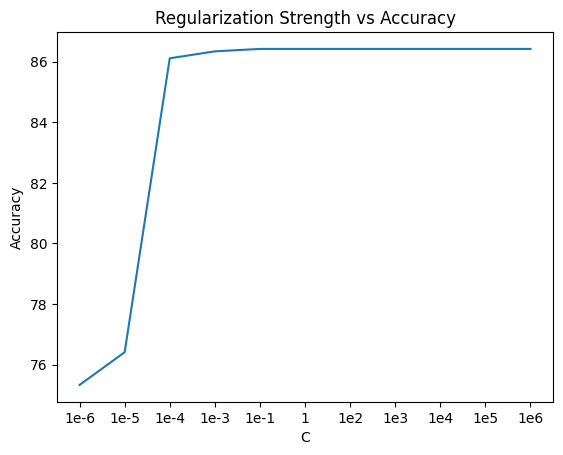

In [60]:
c_value = ["1e-6", '1e-5', '1e-4', '1e-3', '1e-1', '1', '1e2', '1e3', '1e4', '1e5', '1e6']
accuracies = [75.33, 76.41, 86.11, 86.34, 86.42, 86.42, 86.42, 86.42, 86.42, 86.42, 86.42]
  
plt.plot(c_value, accuracies)
plt.title('Regularization Strength vs Accuracy')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

## Decision Trees

In [71]:
from sklearn.tree import DecisionTreeClassifier

### Gini Index

In [72]:
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [73]:
y_pred = dt.predict(X_test)
print('Test accuracy :', accuracy_score(y_test, y_pred))
print('Train accuracy :', accuracy_score(y_train, dt.predict(X_train)))
print(classification_report(y_test, y_pred))

Test accuracy : 1.0
Train accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32537
           1       1.00      1.00      1.00     10658

    accuracy                           1.00     43195
   macro avg       1.00      1.00      1.00     43195
weighted avg       1.00      1.00      1.00     43195



In [74]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

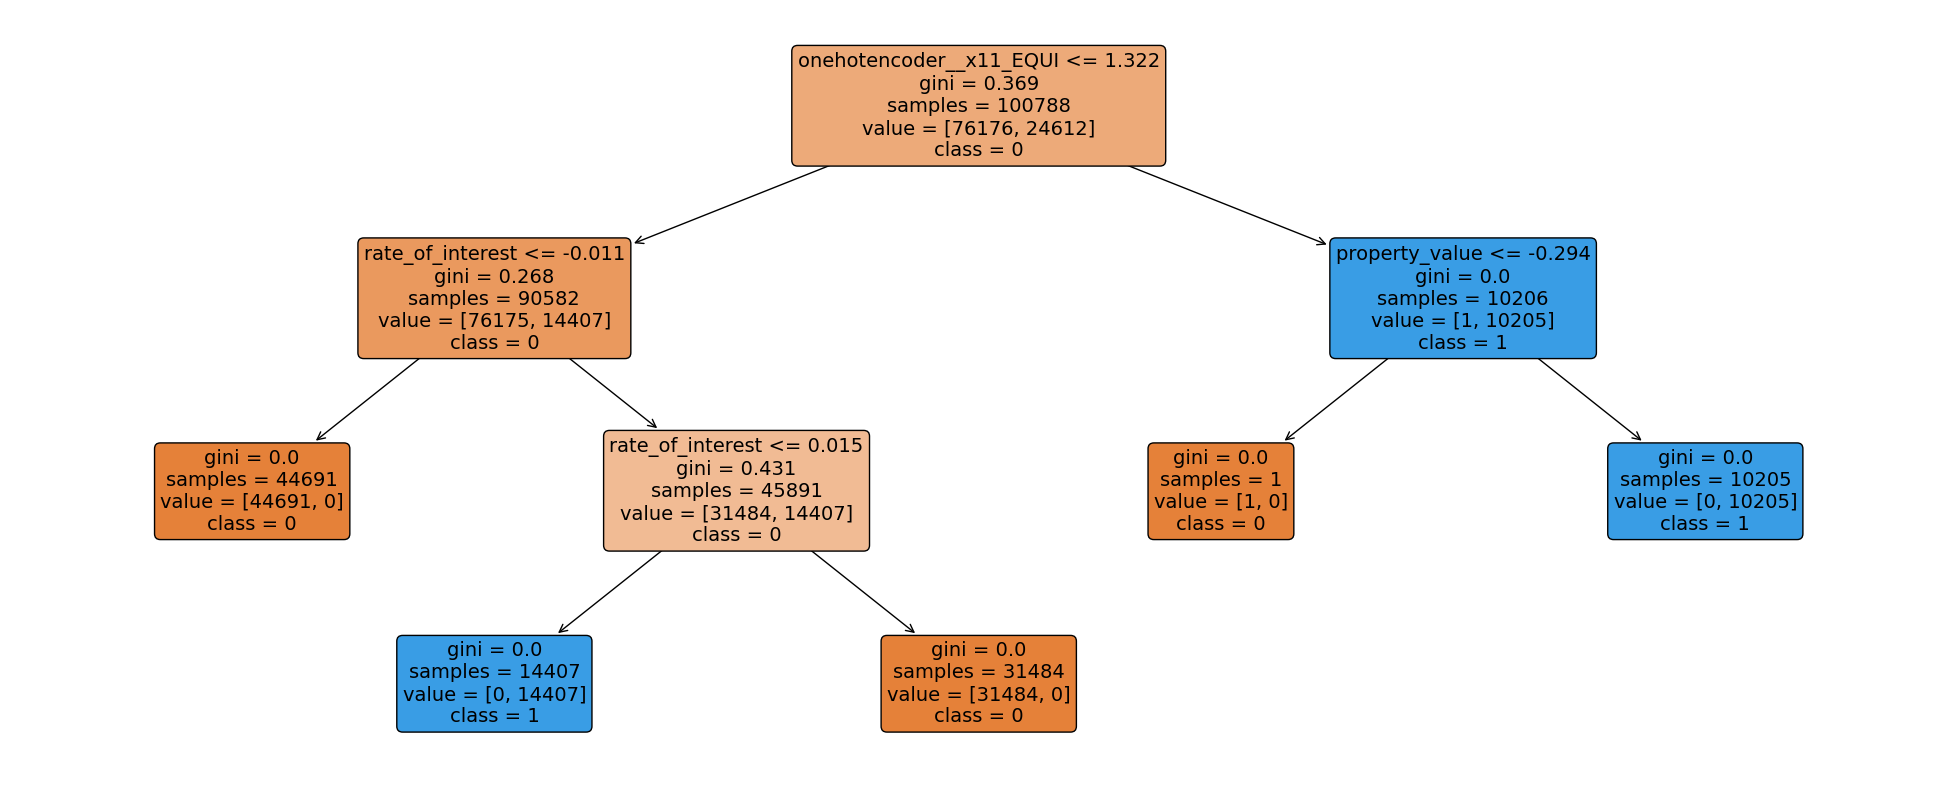

In [75]:
plt.figure(figsize=(25,10))
a = plot_tree(dt, feature_names=featurenames, class_names=['0','1'], filled=True, rounded=True, fontsize=14)
plt.savefig('decisiontree.png')

### Entropy

In [79]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [80]:
y_pred = dt.predict(X_test)
print('Test accuracy :', accuracy_score(y_test, y_pred))
print('Train accuracy :', accuracy_score(y_train, dt.predict(X_train)))
print(classification_report(y_test, y_pred))

Test accuracy : 1.0
Train accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32537
           1       1.00      1.00      1.00     10658

    accuracy                           1.00     43195
   macro avg       1.00      1.00      1.00     43195
weighted avg       1.00      1.00      1.00     43195



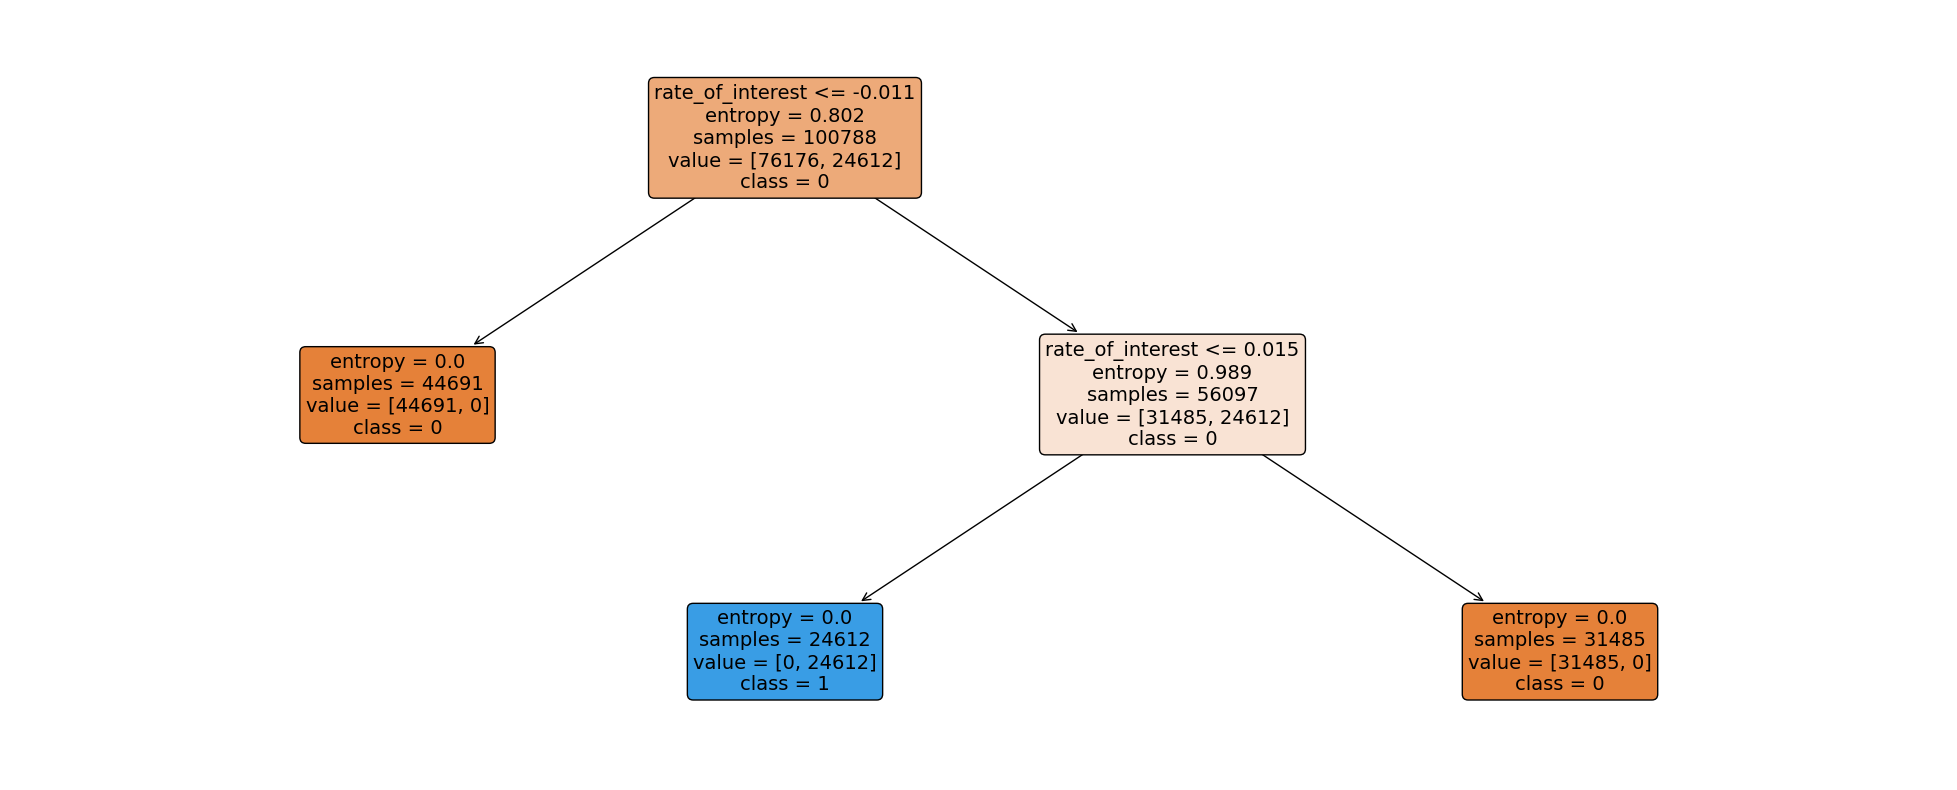

In [81]:
plt.figure(figsize=(25,10))
a = plot_tree(dt, feature_names=featurenames, class_names=['0','1'], filled=True, rounded=True, fontsize=14)
plt.savefig('decisiontree.png')

## Support Vector Machines

### Polynomial Kernel

In [85]:
from sklearn.svm import SVC

In [86]:
degrees = [1, 2, 3, 4, 5]

In [88]:
for currentDegree in degrees :
    currentPolySVM = SVC(kernel='poly',C=10,degree=currentDegree)
    currentPolySVM.fit(X_train, y_train)
    y_pred = currentPolySVM.predict(X_test)
    print("Degree of polynomial", currentDegree)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test,y_pred))
    currentPolySVMAcc = accuracy_score(y_pred, y_test)
    print('PolySVM accuracy: {:.2f}'.format(currentPolySVMAcc*100))
    print('PolySVM training accuracy: {:.2f}'.format(currentPolySVM.score(X_train, y_train)*100))

Degree of polynomial 1
              precision    recall  f1-score   support

           0       0.85      0.99      0.91     32537
           1       0.95      0.46      0.62     10658

    accuracy                           0.86     43195
   macro avg       0.90      0.72      0.77     43195
weighted avg       0.87      0.86      0.84     43195

[[32297   240]
 [ 5804  4854]]
PolySVM accuracy: 86.01
PolySVM training accuracy: 86.20
Degree of polynomial 2
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     32537
           1       0.90      0.72      0.80     10658

    accuracy                           0.91     43195
   macro avg       0.91      0.85      0.87     43195
weighted avg       0.91      0.91      0.91     43195

[[31686   851]
 [ 3022  7636]]
PolySVM accuracy: 91.03
PolySVM training accuracy: 91.47
Degree of polynomial 3
              precision    recall  f1-score   support

           0       0.88      0.98      0.93   

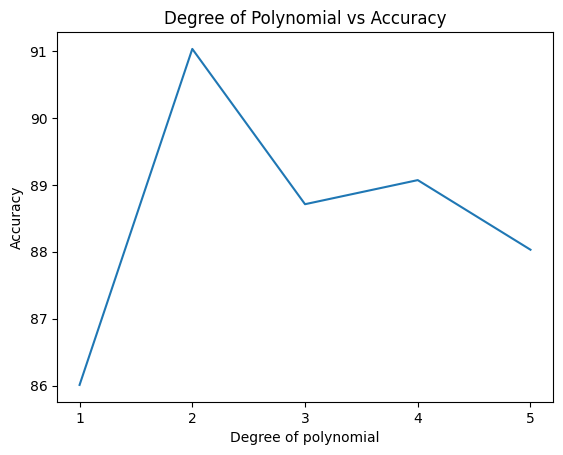

In [91]:
c_value = ["1", "2", '3', '4', '5']
test_accuracies = [86.01, 91.03, 88.71, 89.07, 88.03]
  
plt.plot(c_value, test_accuracies)
plt.title('Degree of Polynomial vs Accuracy')
plt.xlabel('Degree of polynomial')
plt.ylabel('Accuracy')
plt.show()

### Gaussian RBF kernel

In [92]:
C_vals = np.array([1e-10, 0.001, 0.1, 1, 10])

In [93]:
for currentC in C_vals :
    svmRBF = SVC(kernel="rbf", C=currentC)
    svmRBF.fit(X_train, y_train)
    y_pred = svmRBF.predict(X_test)
    print("C value :", currentC)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    svmRBFAcc = accuracy_score(y_pred, y_test)
    print('SVM with RBF kernel accuracy: {:.2f}%'.format(svmRBFAcc*100))

C value : 1e-10
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     32537
           1       0.00      0.00      0.00     10658

    accuracy                           0.75     43195
   macro avg       0.38      0.50      0.43     43195
weighted avg       0.57      0.75      0.65     43195

[[32537     0]
 [10658     0]]
SVM with RBF kernel accuracy: 75.33%


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C value : 0.001
              precision    recall  f1-score   support

           0       0.81      1.00      0.89     32537
           1       1.00      0.28      0.44     10658

    accuracy                           0.82     43195
   macro avg       0.90      0.64      0.67     43195
weighted avg       0.86      0.82      0.78     43195

[[32537     0]
 [ 7639  3019]]
SVM with RBF kernel accuracy: 82.32%
C value : 0.1
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     32537
           1       0.96      0.47      0.63     10658

    accuracy                           0.86     43195
   macro avg       0.90      0.73      0.77     43195
weighted avg       0.88      0.86      0.85     43195

[[32315   222]
 [ 5621  5037]]
SVM with RBF kernel accuracy: 86.47%
C value : 1.0
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     32537
           1       0.94      0.60      0.73     10658

  

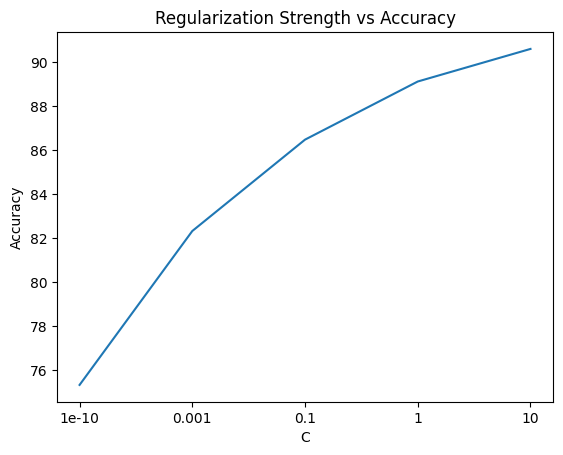

In [94]:
#SVM with RBF kernel
c_value = ["1e-10", '0.001', '0.1', '1', '10']
accuracies = [75.33, 82.32, 86.47, 89.11, 90.59]
  
plt.plot(c_value, accuracies)
plt.title('Regularization Strength vs Accuracy')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()